<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/GeoPandas_Parte_1_Trabalhando_com_dados_Geoespaciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

# Entendendo o funcionamento do GeoPandas

In [2]:
import geopandas as gpd

## Fonte de dados

https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/

In [3]:
rj = gpd.read_file('/content/drive/MyDrive/Analise_de_dados/Mapas/33MUE250GC_SIR.shp')

In [4]:
type(rj)

geopandas.geodataframe.GeoDataFrame

In [5]:
rj

ID  ...                                           geometry
0   1468  ...  MULTIPOLYGON (((-44.33208 -23.02384, -44.33221...
1   1469  ...  POLYGON ((-42.08950 -21.62893, -42.08912 -21.6...
2   1470  ...  POLYGON ((-42.22526 -22.59253, -42.22521 -22.5...
3   1471  ...  POLYGON ((-43.16007 -22.20005, -43.16003 -22.1...
4   1472  ...  MULTIPOLYGON (((-41.98427 -22.74458, -41.98296...
..   ...  ...                                                ...
87  1555  ...  POLYGON ((-43.13666 -22.10933, -43.13182 -22.1...
88  1556  ...  POLYGON ((-43.82120 -22.08844, -43.82101 -22.0...
89  1557  ...  POLYGON ((-41.82695 -20.84164, -41.82686 -20.8...
90  1558  ...  POLYGON ((-43.61208 -22.30841, -43.61113 -22.3...
91  1559  ...  POLYGON ((-44.13912 -22.53062, -44.13878 -22.5...

[92 rows x 4 columns]

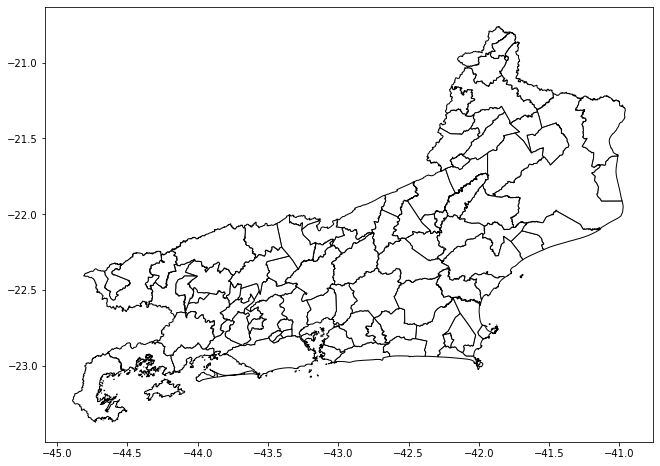

In [6]:
rj.plot(color='white', edgecolor='black', figsize=(15,8));

In [7]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

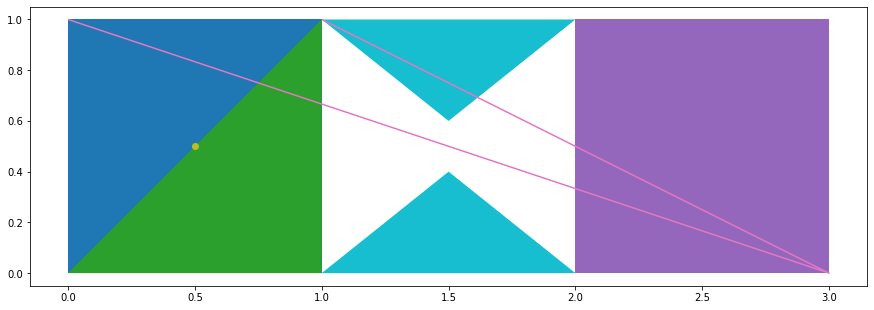

In [8]:
p1 = Polygon([(0,0), (1,0), (1,1), (0,1)])
p2 = Polygon([(0,0), (1,0), (1,1)])
p3 = Polygon([(2,0), (3,0), (3,1), (2,1)])
p4 = LineString([(0,1), (3,0), (1,1)])
p5 = Point(0.5, 0.5)
p6 = Polygon([(1,0), (1.5,0.4), (2,0)])
p7 = Polygon([(1,1), (1.5,0.6), (2,1)])
p8 = MultiPolygon([p6, p7])

g = gpd.GeoSeries([p1, p2, p3, p4, p5, p8])
g.plot(cmap='tab10', figsize=(15,8));

In [9]:
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
5    MULTIPOLYGON (((1.00000 0.00000, 1.50000 0.400...
dtype: geometry

# Criando Shapefiles

In [10]:
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

In [11]:
rj

ID  ...                                           geometry
67  1535  ...  MULTIPOLYGON (((-43.12376 -22.80712, -43.12380...

[1 rows x 4 columns]

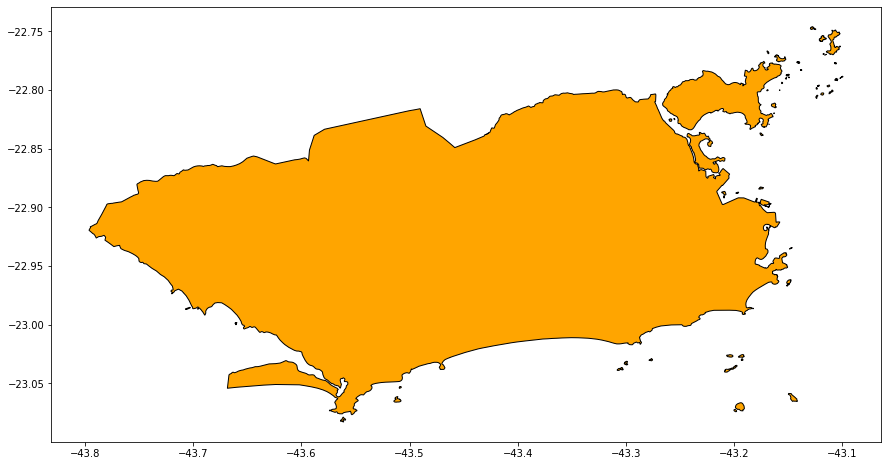

In [12]:
rj.plot(color='orange', edgecolor='black', figsize=(15,8));

## Salvando

In [13]:
import os

dir = '/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-MUNIC'
if not os.path.exists(dir):
    os.makedirs(dir)

In [14]:
rj.to_file(dir + '/RJ-MUNIC.shp')

# Transformando DataFrame em GeoDataFrame

In [15]:
import pandas as pd

In [16]:
dados = pd.read_table('https://raw.githubusercontent.com/Daniel-ASG/Aulas_de_cursos/main/dados.txt')
dados.head()

Area                    Bairro  ... Transacao    Valor
0   138  Recreio dos Bandeirantes  ...     Venda  1095000
1   133   Freguesia (Jacarepaguá)  ...     Venda   650000
2    46                   Pilares  ...     Venda   150000
3    65           Barra da Tijuca  ...     Venda   430000
4    85                     Gávea  ...     Venda  1800000

[5 rows x 13 columns]

In [17]:
from shapely.geometry import Point

In [18]:
x = zip(dados.Longitude, dados.Latitude)
x

In [19]:
list(x)

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.477504700000004, -23.0189271),
 (-43.247108700000005, -22.933574899999996),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.922570899999997),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982000000002),
 (-43.1849587, -22.970644399999998),
 (-43.354812100000004, -23.0097423),
 (-49.0606445, -26.922570899999997),
 (-43.3461644, -22.938107000000002),
 (-43.181953799999995, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.280851500000004, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.019108300000003),
 (-43.45904960000001, -23.023215),
 (-43.233903399999996, -22.9936095),
 (-43.1987716, -22.985367999999998),
 (-43.230810600000005, -22.9771863),
 (-43.2525968, -22.926766600000004),
 (-51.92528, -14.235004),
 (-43.18529320

In [20]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]

In [21]:
crs = {'proj': 'latlong', 'ellps':'WGS84', 'datun':'WGS84', 'no_defs':True}
geo_dados = gpd.GeoDataFrame(dados, crs=crs, geometry=geometry)

In [22]:
geo_dados

Area                    Bairro  ...    Valor                     geometry
0      138  Recreio dos Bandeirantes  ...  1095000  POINT (-43.46295 -23.01646)
1      133   Freguesia (Jacarepaguá)  ...   650000  POINT (-43.33691 -22.94320)
2       46                   Pilares  ...   150000  POINT (-43.30052 -22.87385)
3       65           Barra da Tijuca  ...   430000  POINT (-43.41270 -22.98479)
4       85                     Gávea  ...  1800000  POINT (-51.92528 -14.23500)
...    ...                       ...  ...      ...                          ...
4995    48              Campo Grande  ...   170000  POINT (-43.55076 -22.87835)
4996    75  Recreio dos Bandeirantes  ...   550000  POINT (-43.48729 -23.02472)
4997    32           Jardim Botânico  ...   580000  POINT (-43.20618 -22.95943)
4998    85                    Grajaú  ...   325000  POINT (-43.26049 -22.91877)
4999    52              Campo Grande  ...   135000  POINT (-43.49115 -22.88288)

[5000 rows x 14 columns]

In [23]:
dir = '/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir)

In [24]:
geo_dados.to_file(dir + '/DATASET.shp')

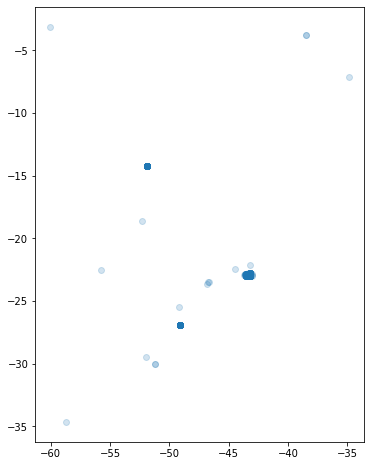

In [25]:
geo_dados.plot(figsize=(15,8), alpha=0.2)

# Modificando o sistema de coordenadas

## Fonte de dados

http://www.spatialreference.org/

https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html

![UTM_Brasil[1].png](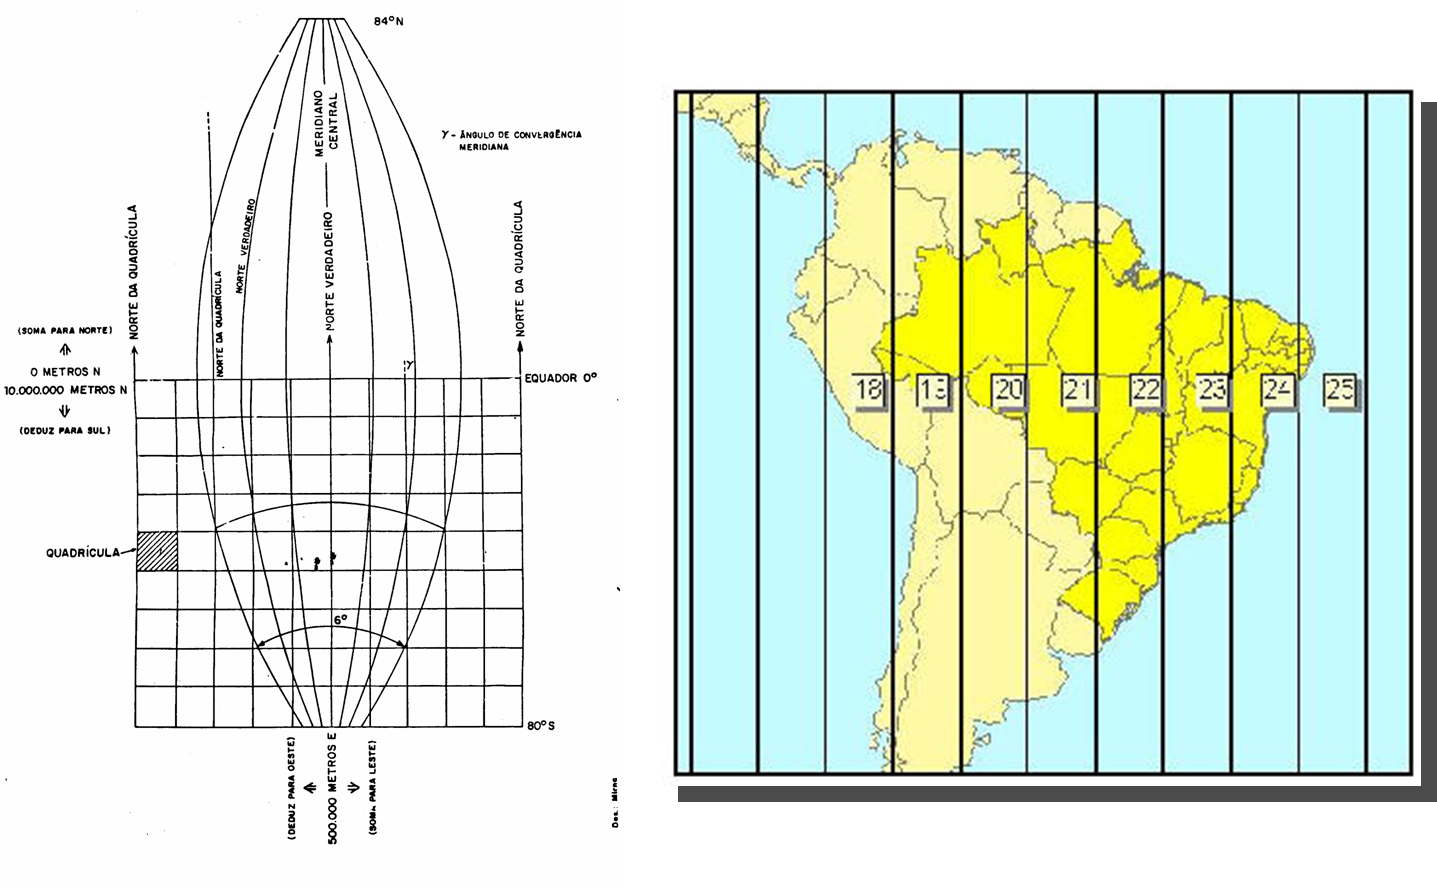)

In [26]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: SIRGAS2000
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [27]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datun=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: Unknown based on WGS84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [29]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [30]:
rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [31]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [32]:
rj.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET/DATASET.shp')

In [33]:
rj2 = gpd.read_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
rj2

ID  ...                                           geometry
0  1535  ...  MULTIPOLYGON (((692.576 7476.609, 692.572 7476...

[1 rows x 4 columns]

In [34]:
rj2.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_unknown", ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Selecionando pontos dentro de uma região

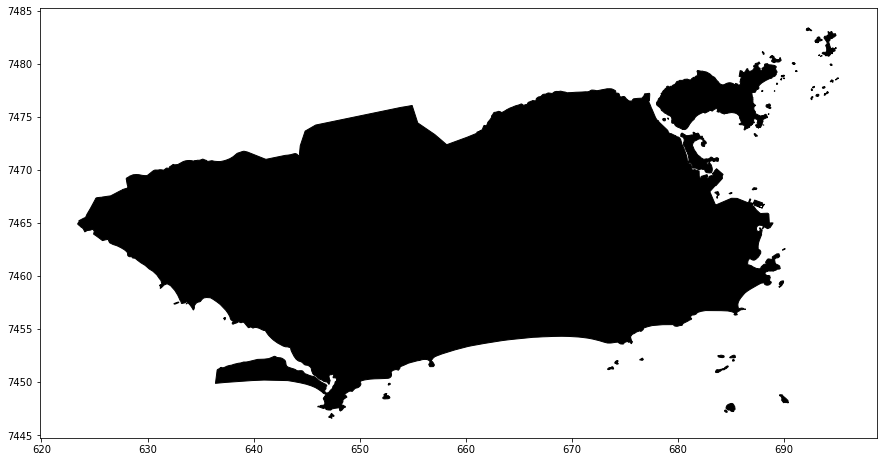

In [35]:
rj.plot(color='black', edgecolor='black', figsize=(15,8))

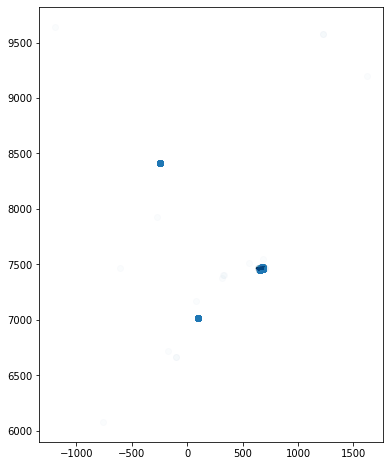

In [36]:
base = rj.plot(color='black', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.02)

In [37]:
rj.iloc[0]

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692.5758012880638 7476.609203982483...
Name: 67, dtype: object

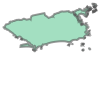

In [38]:
rj.iloc[0].geometry

In [39]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

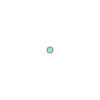

In [40]:
geo_dados.iloc[0].geometry

In [41]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [42]:
rj.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

In [43]:
geo_dados['geometry'].within(rj.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [44]:
amostra = geo_dados.iloc[:12]
amostra

Area                    Bairro  ...    Valor                   geometry
0    138  Recreio dos Bandeirantes  ...  1095000   POINT (657.514 7453.832)
1    133   Freguesia (Jacarepaguá)  ...   650000   POINT (670.524 7461.803)
2     46                   Pilares  ...   150000   POINT (674.345 7469.440)
3     65           Barra da Tijuca  ...   430000   POINT (662.701 7457.284)
4     85                     Gávea  ...  1800000  POINT (-248.715 8415.117)
5    260  Recreio dos Bandeirantes  ...  1160000   POINT (656.019 7453.574)
6     74                    Tijuca  ...   595000   POINT (679.746 7462.762)
7    200                Copacabana  ...  2100000   POINT (685.278 7457.298)
8    119           Barra da Tijuca  ...  1130000  POINT (-248.715 8415.117)
9     88                  Flamengo  ...  1450000   POINT (687.096 7462.359)
10    67                    Grajaú  ...   450000   POINT (678.142 7464.447)
11    96                      Tauá  ...   390000    POINT (96.646 7015.662)

[12 rows x 14 columns]

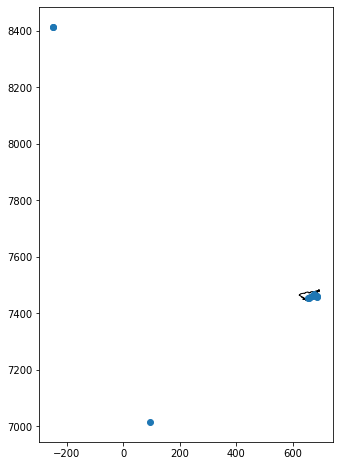

In [45]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
amostra.plot(ax=base, figsize=(15,8), alpha=1)

In [46]:
antes = geo_dados.shape[0]
antes

5000

In [47]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

In [48]:
depois = geo_dados.shape[0]
depois

4513

In [49]:
antes - depois

487

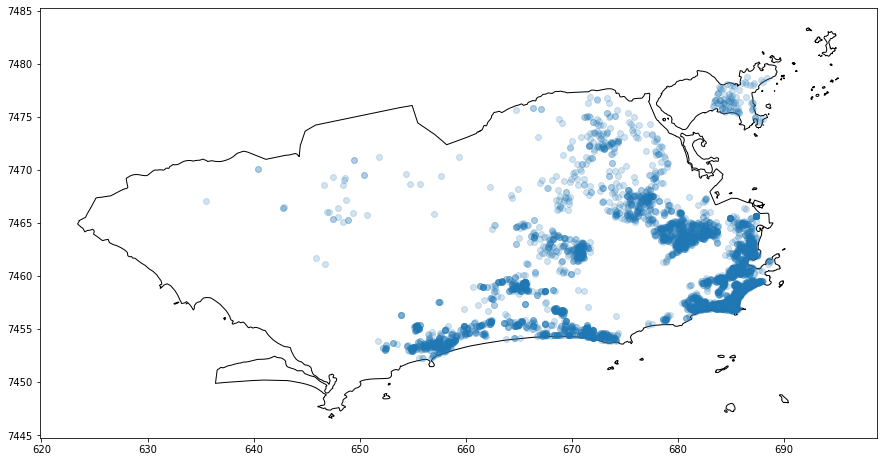

In [50]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.2)

In [51]:
geo_dados.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET/DATASET.shp')

# Distâncias até a estação de metrô mais próxima

## Fonte de dados
* www.data.rio
* https://www.data.rio/datasets/esta%C3%A7%C3%B5es-metr%C3%B4
* https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

In [52]:
metro = gpd.read_file('https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson')
metro.head()

OBJECTID  Cod  ... Data_Inauguracao                     geometry
0         1    1  ...             1998  POINT (-43.36485 -22.80662)
1         2    2  ...             1998  POINT (-43.35845 -22.81627)
2         3    3  ...             1998  POINT (-43.34964 -22.82452)
3         4    4  ...             1998  POINT (-43.34326 -22.83148)
4         5    5  ...             1998  POINT (-43.33386 -22.84269)

[5 rows x 23 columns]

In [53]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [55]:
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [56]:
metro.head()

OBJECTID  Cod  ... Data_Inauguracao                  geometry
0         1    1  ...             1998  POINT (667.827 7476.959)
1         2    2  ...             1998  POINT (668.471 7475.883)
2         3    3  ...             1998  POINT (669.365 7474.959)
3         4    4  ...             1998  POINT (670.012 7474.182)
4         5    5  ...             1998  POINT (670.963 7472.930)

[5 rows x 23 columns]

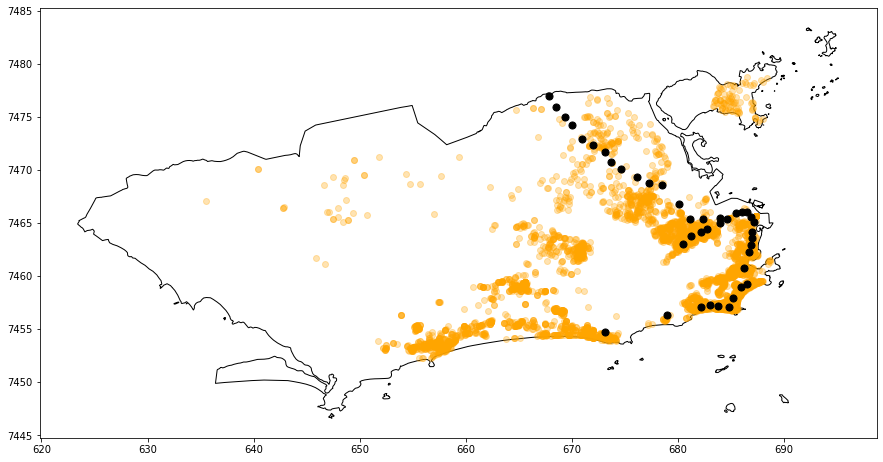

In [57]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.3)
metro.plot(ax=base, color='black', markersize=50)

In [58]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

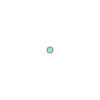

In [59]:
geo_dados.iloc[0].geometry

In [60]:
distances = metro.distance(geo_dados.iloc[0].geometry)
distances

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [61]:
distances.min()

15.62293882499506

In [62]:
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

In [63]:
geo_dados.head()

Area                    Bairro  ...                  geometry Dist_Metro
0   138  Recreio dos Bandeirantes  ...  POINT (657.514 7453.832)  15.622939
1   133   Freguesia (Jacarepaguá)  ...  POINT (670.524 7461.803)   7.530741
2    46                   Pilares  ...  POINT (674.345 7469.440)   0.736973
3    65           Barra da Tijuca  ...  POINT (662.701 7457.284)  10.718039
5   260  Recreio dos Bandeirantes  ...  POINT (656.019 7453.574)  17.131159

[5 rows x 15 columns]

In [64]:
geo_dados.corr()

Area  Latitude  Longitude  ...     Vagas     Valor  Dist_Metro
Area        1.000000 -0.289299   0.029982  ...  0.594699  0.724397   -0.036671
Latitude   -0.289299  1.000000   0.292822  ... -0.274707 -0.299038   -0.217864
Longitude   0.029982  0.292822   1.000000  ... -0.283960  0.191868   -0.874788
Quartos     0.681112 -0.225226  -0.016882  ...  0.520499  0.481216    0.021794
Suites      0.585817 -0.346480  -0.221548  ...  0.621140  0.464075    0.188521
Vagas       0.594699 -0.274707  -0.283960  ...  1.000000  0.456596    0.215787
Valor       0.724397 -0.299038   0.191868  ...  0.456596  1.000000   -0.195641
Dist_Metro -0.036671 -0.217864  -0.874788  ...  0.215787 -0.195641    1.000000

[8 rows x 8 columns]

In [65]:
coef = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])
coef

-0.195640831616868

In [66]:
geo_dados.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET/DATASET.shp')

# Agregando outros tipos de transporte

## Fontes de dados
Trens
* https://www.data.rio/datasets/esta%C3%A7%C3%B5es-trem
* https://opendata.arcgis.com/datasets/8c9f264be1e946b1b49cf4c198bd5e46_16.geojson

BRT
* https://www.data.rio/datasets/esta%C3%A7%C3%B5es-brt
* https://opendata.arcgis.com/datasets/f753941f44a749d4987f1111aa6486b3_22.geojson

### Estações de trem

In [67]:
trem = gpd.read_file('https://opendata.arcgis.com/datasets/8c9f264be1e946b1b49cf4c198bd5e46_16.geojson')
trem.head()

OBJECTID  Cod  ... Corredor_BRT                     geometry
0         1   60  ...         None  POINT (-43.44939 -22.76073)
1         2   20  ...         None  POINT (-43.48895 -22.74415)
2         3    4  ...         None  POINT (-43.52271 -22.72031)
3         4   81  ...         None  POINT (-43.55610 -22.71624)
4         5   29  ...         None  POINT (-43.60606 -22.67875)

[5 rows x 24 columns]

In [68]:
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
trem.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

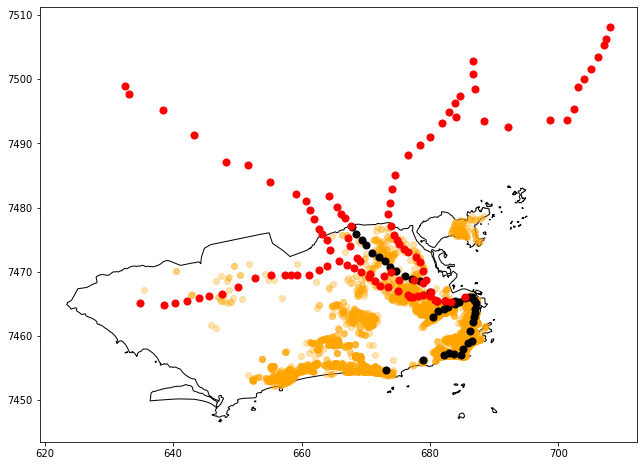

In [69]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.3)
metro.plot(ax=base, color='black', markersize=50)
trem.plot(ax=base, color='red', markersize=50)

In [70]:
trem = trem[trem.within(rj.iloc[0].geometry)]

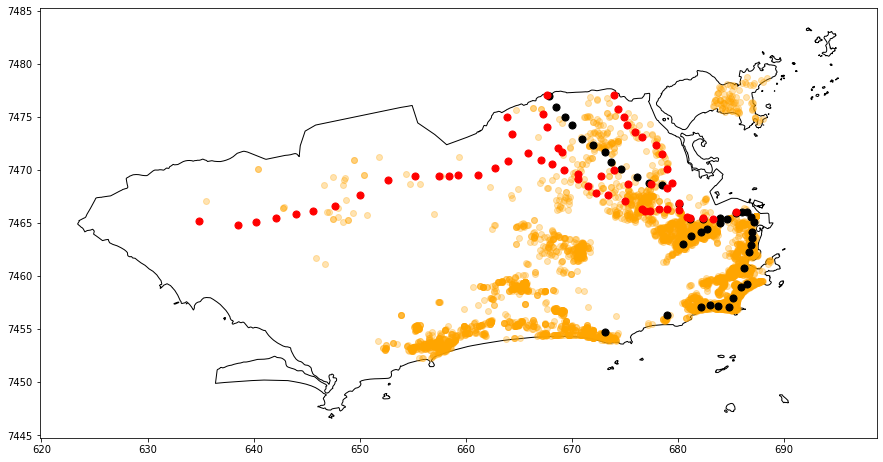

In [71]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.3)
metro.plot(ax=base, color='black', markersize=50)
trem.plot(ax=base, color='red', markersize=50)

### Estações BRT

In [72]:
BRT = gpd.read_file('https://opendata.arcgis.com/datasets/f753941f44a749d4987f1111aa6486b3_22.geojson')
BRT.head()

OBJECTID  ...                     geometry
0         1  ...  POINT (-43.25244 -22.85513)
1         2  ...  POINT (-43.24383 -22.84709)
2         3  ...  POINT (-43.25824 -22.85743)
3         4  ...  POINT (-43.27706 -22.84158)
4         5  ...  POINT (-43.27666 -22.84205)

[5 rows x 16 columns]

In [73]:
BRT = BRT.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
BRT.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

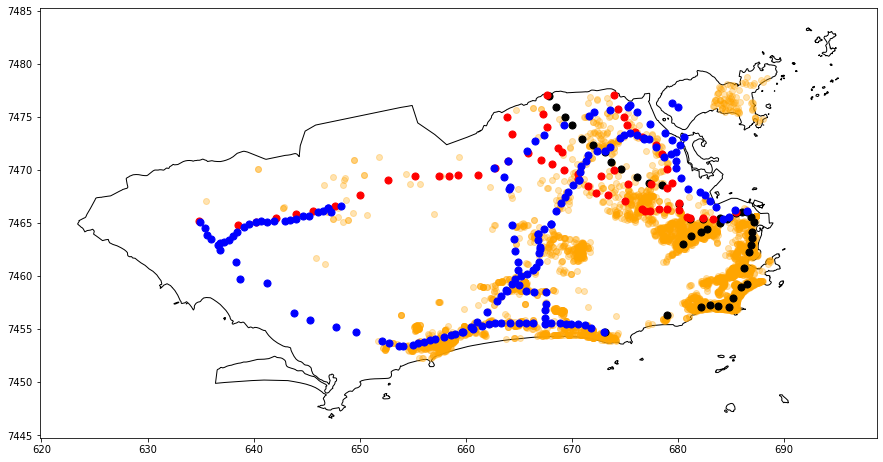

In [74]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.3)
metro.plot(ax=base, color='black', markersize=50)
trem.plot(ax=base, color='red', markersize=50)
BRT.plot(ax=base, color='blue', markersize=50)

In [75]:
transporte = pd.concat([trem.geometry, metro.geometry, BRT.geometry], ignore_index=True)
transporte

0      POINT (676.866 7466.079)
1      POINT (663.964 7470.815)
2      POINT (662.792 7470.218)
3      POINT (661.119 7469.485)
4      POINT (659.274 7469.469)
                 ...           
257    POINT (664.056 7468.207)
258    POINT (663.576 7469.330)
259    POINT (662.677 7470.133)
260    POINT (663.983 7470.796)
261    POINT (664.181 7468.397)
Length: 262, dtype: geometry

In [76]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())
geo_dados.head()

Area                    Bairro  ... Dist_Metro Dist_Transporte
0   138  Recreio dos Bandeirantes  ...  15.622939        0.443193
1   133   Freguesia (Jacarepaguá)  ...   7.530741        3.642787
2    46                   Pilares  ...   0.736973        0.641470
3    65           Barra da Tijuca  ...  10.718039        0.422370
5   260  Recreio dos Bandeirantes  ...  17.131159        0.214605

[5 rows x 16 columns]

In [77]:
geo_dados.corr()

Area  Latitude  ...  Dist_Metro  Dist_Transporte
Area             1.000000 -0.289299  ...   -0.036671        -0.042684
Latitude        -0.289299  1.000000  ...   -0.217864         0.358735
Longitude        0.029982  0.292822  ...   -0.874788        -0.031812
Quartos          0.681112 -0.225226  ...    0.021794        -0.014628
Suites           0.585817 -0.346480  ...    0.188521         0.006363
Vagas            0.594699 -0.274707  ...    0.215787         0.070240
Valor            0.724397 -0.299038  ...   -0.195641        -0.103653
Dist_Metro      -0.036671 -0.217864  ...    1.000000         0.261040
Dist_Transporte -0.042684  0.358735  ...    0.261040         1.000000

[9 rows x 9 columns]

In [78]:
geo_dados.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET/DATASET.shp')

# Distância até a praia

## Fontes de dados

* https://www.data.rio/datasets/cobertura-vegetal-e-uso-da-terra-2016-1
* https://opendata.arcgis.com/datasets/a22768dc645043f5bdfd1affab888ded_0.geojson


In [79]:
praias = gpd.read_file('https://opendata.arcgis.com/datasets/a22768dc645043f5bdfd1affab888ded_0.geojson')
praias.head()

Sigla  ...                                           geometry
0   Con  ...  POLYGON ((-43.56564 -23.06173, -43.56674 -23.0...
1   Con  ...  POLYGON ((-43.59625 -23.04796, -43.59635 -23.0...
2   Con  ...  POLYGON ((-43.59737 -23.04845, -43.59721 -23.0...
3   Con  ...  POLYGON ((-43.60748 -23.04327, -43.60768 -23.0...
4    Vg  ...  POLYGON ((-43.57116 -23.05929, -43.57113 -23.0...

[5 rows x 12 columns]

In [80]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
praias.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

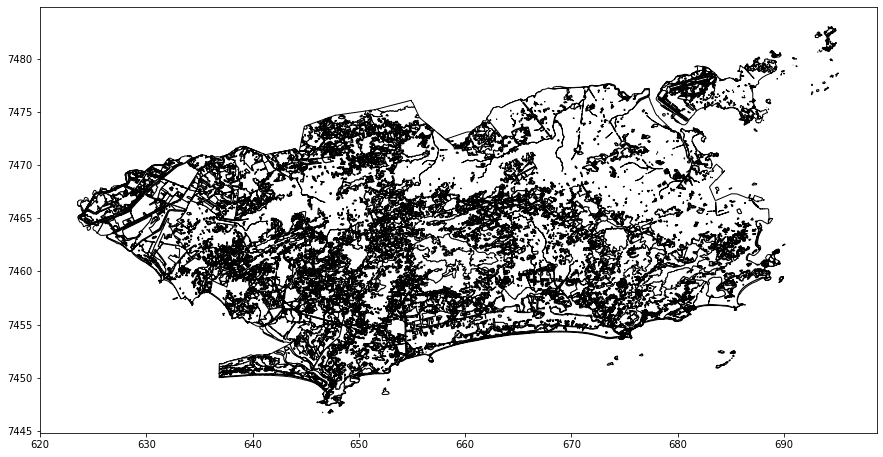

In [81]:
praias.plot(color='white', edgecolor='black', figsize=(15,8))

In [82]:
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3492
Vegetação gramíneo-lenhosa                                          1993
Áreas Urbanas                                                        636
Floresta Ombrófila Densa, Estágio Inicial                            627
Afloramento Rochoso                                                  471
Uso agrícola, Lavoura Permanente                                     438
Floresta Ombrófila Densa, Estágio Médio                              406
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Formação Pioneira com influência flúvio-marinha, Campo Salino        150
Solo exposto                                       

In [83]:
praias = praias[praias.legenda == 'Praia']

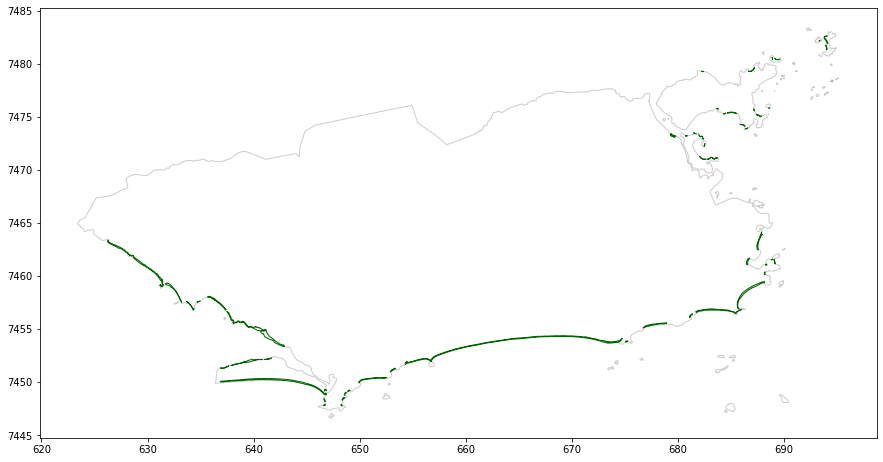

In [84]:
base = rj.plot(color='white', edgecolor='black', alpha=0.2, figsize=(15,8))
praias.plot(ax=base, color='white', edgecolor='darkgreen')

In [85]:
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())
geo_dados.head()

Area                    Bairro  ... Dist_Transporte Dist_Praia
0   138  Recreio dos Bandeirantes  ...        0.443193   1.143453
1   133   Freguesia (Jacarepaguá)  ...        3.642787   7.478698
2    46                   Pilares  ...        0.641470   6.240694
3    65           Barra da Tijuca  ...        0.422370   3.404589
5   260  Recreio dos Bandeirantes  ...        0.214605   1.369015

[5 rows x 17 columns]

In [87]:
geo_dados.corr()

Area  Latitude  ...  Dist_Transporte  Dist_Praia
Area             1.000000 -0.289299  ...        -0.042684   -0.290745
Latitude        -0.289299  1.000000  ...         0.358735    0.560706
Longitude        0.029982  0.292822  ...        -0.031812   -0.317743
Quartos          0.681112 -0.225226  ...        -0.014628   -0.185830
Suites           0.585817 -0.346480  ...         0.006363   -0.196555
Vagas            0.594699 -0.274707  ...         0.070240   -0.104571
Valor            0.724397 -0.299038  ...        -0.103653   -0.361520
Dist_Metro      -0.036671 -0.217864  ...         0.261040    0.187804
Dist_Transporte -0.042684  0.358735  ...         1.000000    0.230640
Dist_Praia      -0.290745  0.560706  ...         0.230640    1.000000

[10 rows x 10 columns]

In [88]:
geo_dados.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET/DATASET.shp')